# L19 Bootstrap

Key concepts: Parametric bootstrap, non-parametric bootstrap on a random variable. Non-parametric bootstrap on regression.

In [ ]:
# plot settings
options(repr.plot.width=4, repr.plot.height=3)

Example: Use maximum likelihood to estimate the parameter of a exponential distribution.

From simulated data: To estimate the distribution of the estimator, we could repeat the simulation many times.

In [78]:
NObservations <- 200
observations = rexp(NObservations,rate=2.63)

rate_hat <- 1/mean(observations)

rate_hat



[1] 2.71196

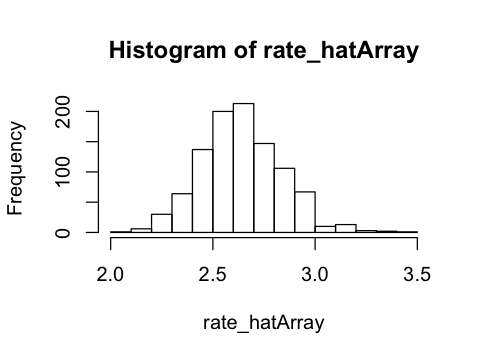

In [81]:
NResimulate <- 1000

# initialize an array to store all the estimates
rate_hatArray <-0

for (iSimulation in 1:NResimulate){
    
    NObservations <- 200
    observations = rexp(NObservations,rate=2.63) # Note these simulations use the true value

    rate_hat <- 1/mean(observations)

    rate_hatArray[iSimulation] = rate_hat
    
}

hist(rate_hatArray)

In [82]:
sd(rate_hatArray)

quantile(rate_hatArray)

quantile(rate_hatArray, probs = c(0.025, 0.975))

[1] 0.1959015

0%      25%      50%      75%     100% 
2.096038 2.508009 2.631221 2.765944 3.461918

2.5%    97.5% 
2.275843 3.036903

If we have high confidence in the model and the estimate of the parameter, we can simulate data and repeat the estimation process. This is called __parametric bootstrap__. Note this requires the ability to forward-simulate the probability model.

---

In reality, we might not have high confidence in the model, or it might be difficult or impossible to forward-simulate the model.

In [90]:
NObservations <- 20
observations <- rexp(NObservations,rate=2.63)

observations

rate_hatORIGINAL <- 1/mean(observations)

rate_hatORIGINAL

[1] 0.18801270 0.12931934 0.68923784 0.01150525 0.13756501 0.56385679
 [7] 0.00749027 0.25274217 0.20669021 0.34846830 0.33053893 0.29571046
[13] 0.72052300 0.12977204 1.47333377 0.08114328 0.23680829 0.29588110
[19] 0.29365015 0.08441578

[1] 3.088009

[1] 0.1894216

0%      25%      50%      75%     100% 
2.001163 2.505088 2.630600 2.762788 3.273623

2.5%    97.5% 
2.294638 3.034393

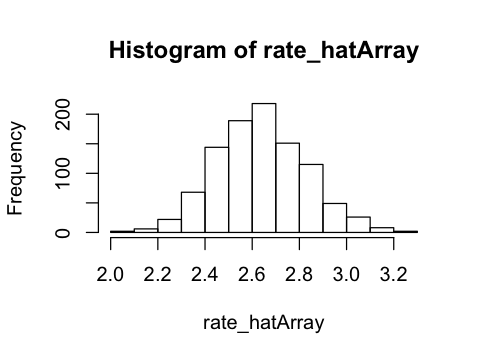

In [89]:
NResimulate <- 1000

# initialize an array to store all the estimates
rate_hatArray <-0

for (iSimulation in 1:NResimulate){
    
    NObservations <- 200
    observations = rexp(NObservations,rate=rate_hatORIGINAL) # Note these simulations use the true value

    rate_hat <- 1/mean(observations)

    rate_hatArray[iSimulation] = rate_hat
    
}

hist(rate_hatArray)

sd(rate_hatArray)

quantile(rate_hatArray)

quantile(rate_hatArray, probs = c(0.025, 0.975))

Alternatively, we can resample with replacement from the data, and repeat the estimation process. This is called __non-parametric bootstrap__. Note this does not require the ability to forward-simulate the model.

[1] 0.7514485

0%      25%      50%      75%     100% 
1.605171 2.708124 3.193414 3.692677 6.863355

5%      95% 
2.196396 4.685712

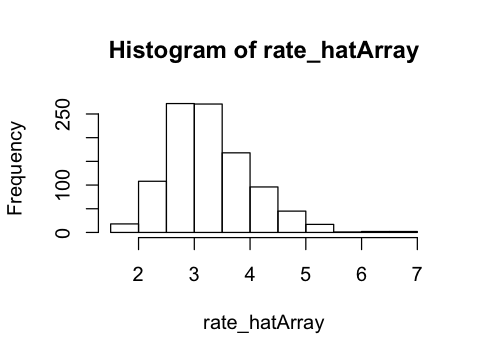

In [91]:
NResample <- 1000

# initialize an array to store all the estimates
rate_hatArray <-0

for (iResample in 1:NResample){

    NObservations <- 20
    resampledObservations <- sample(observations, size=NObservations, replace = TRUE)
   
    rate_hat <- 1/mean(resampledObservations)
    
    rate_hatArray[iResample] = rate_hat
    
}


hist(rate_hatArray)

sd(rate_hatArray)

quantile(rate_hatArray)

quantile(rate_hatArray, probs = c(0.05, 0.95))

---
Non-parametric bootstrap is extremely general. For any inference algorithm, if a resampling of the data can be made, bootstrap can be used.

Let's use it on linear regression.

In [ ]:
# Simulate some linear data with noise
N <- 100
beta0 <- 10.5
beta1 <- 2.6
sigma <- 1.4

X <- seq(0,10,length=N)
eps <- rnorm(N,0,sigma)

Y <- beta0 + beta1*X +eps

plot(X,Y)

In [ ]:
NResample <- 1000

# initialize an array to store all the estimates
beta0_hatArray <-0
beta1_hatArray <-0


for (iResample in 1:NResample){

    thisSampleRows <- sample(N, replace = TRUE) # which rows of X and Y to take in this resample
    Y_thisSample = Y[thisSampleRows]
    X_thisSample = X[thisSampleRows]
    
    thisFit = lm(Y_thisSample~X_thisSample)
    
    beta0_hatArray[iResample] = coef(thisFit)[1]
    beta1_hatArray[iResample] = coef(thisFit)[2]
    
}

hist(beta0_hatArray)
hist(beta1_hatArray)
